In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#### Import Keras Dataset

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 7s 1us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

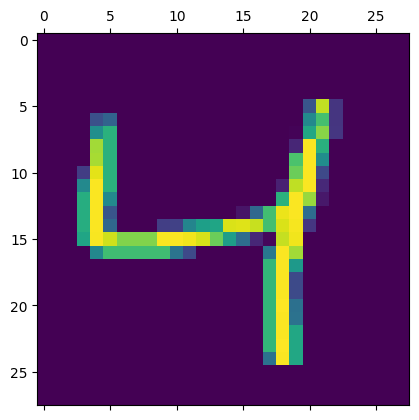

In [8]:
plt.matshow(X_train[2])

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train = X_train / 255
X_test = X_test / 255

In [19]:
X_train_flat = X_train.reshape(len(X_train),28*28)
X_train_flat.shape

(60000, 784)

In [21]:
X_test_flat = X_test.reshape(len(X_test),28*28)
X_test_flat.shape

(10000, 784)

In [22]:
X_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4674 - accuracy: 0.8760
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3031 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2829 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2727 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2663 - accuracy: 0.9259


In [24]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2659 - accuracy: 0.9250


[0.26586490869522095, 0.925000011920929]

#### Predict - 7

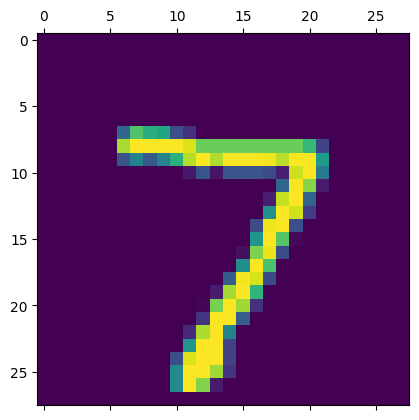

In [29]:
plt.matshow(X_test[0])

In [26]:
y_pred = model.predict(X_test_flat)

313/313 [==============================] - 1s 3ms/step


In [27]:
y_pred[0]

array([2.7343027e-02, 5.3413419e-07, 8.7923460e-02, 9.6114922e-01,
       1.9504443e-03, 1.0292020e-01, 2.2698246e-06, 9.9983448e-01,
       1.4461254e-01, 7.0204031e-01], dtype=float32)

In [28]:
np.argmax(y_pred[0])

7

#### Predict - 2

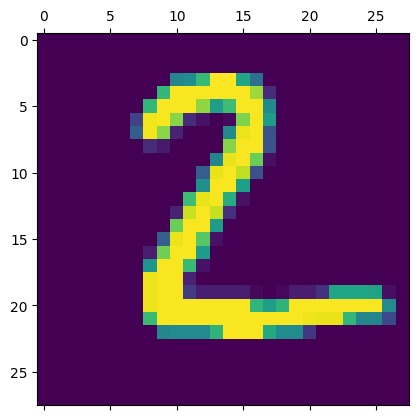

In [30]:
plt.matshow(X_test[1])

In [31]:
y_pred[1]

array([3.9743727e-01, 4.7188103e-03, 9.9965769e-01, 3.5612211e-01,
       3.3393141e-10, 8.1588179e-01, 8.7399745e-01, 8.5672962e-13,
       1.7352062e-01, 1.9977731e-09], dtype=float32)

In [32]:
np.argmax(y_pred[1])

2

In [34]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [33]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [36]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    5,    6,    3,    3,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   4,    8,  937,   15,    7,    2,   12,    9,   34,    4],
       [   2,    0,   22,  926,    0,   16,    2,   11,   23,    8],
       [   1,    1,    9,    0,  907,    0,    9,    5,    9,   41],
       [  10,    3,    7,   49,    8,  746,   12,    9,   42,    6],
       [  10,    3,   11,    1,    7,   10,  909,    2,    5,    0],
       [   1,    5,   25,    5,    4,    0,    0,  957,    3,   28],
       [   5,    9,    8,   20,    9,   17,   10,   14,  878,    4],
       [   9,    7,    2,   11,   20,    5,    0,   30,   11,  914]])>

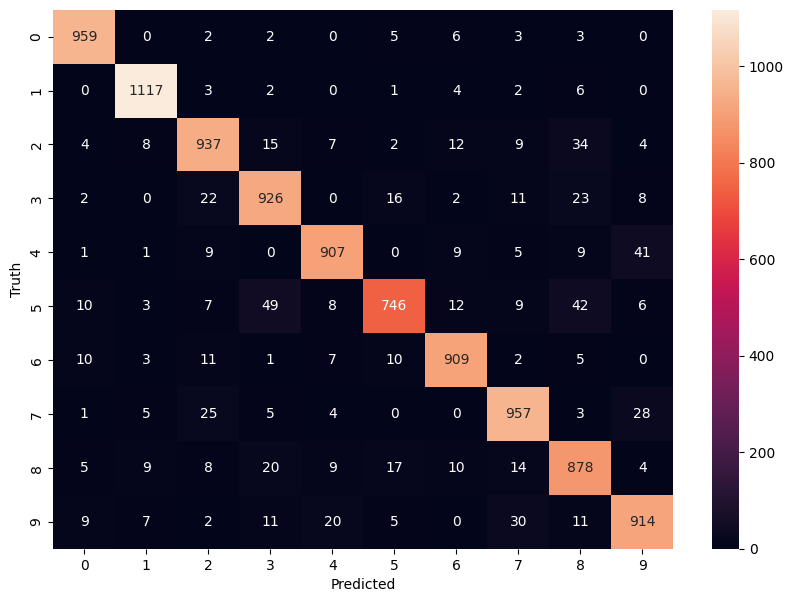

In [38]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Adding Hidden Layer

In [39]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2747 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1255 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0885 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0664 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0539 - accuracy: 0.9836


In [40]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0802 - accuracy: 0.9751


[0.08023141324520111, 0.9750999808311462]

313/313 [==============================] - 1s 3ms/step


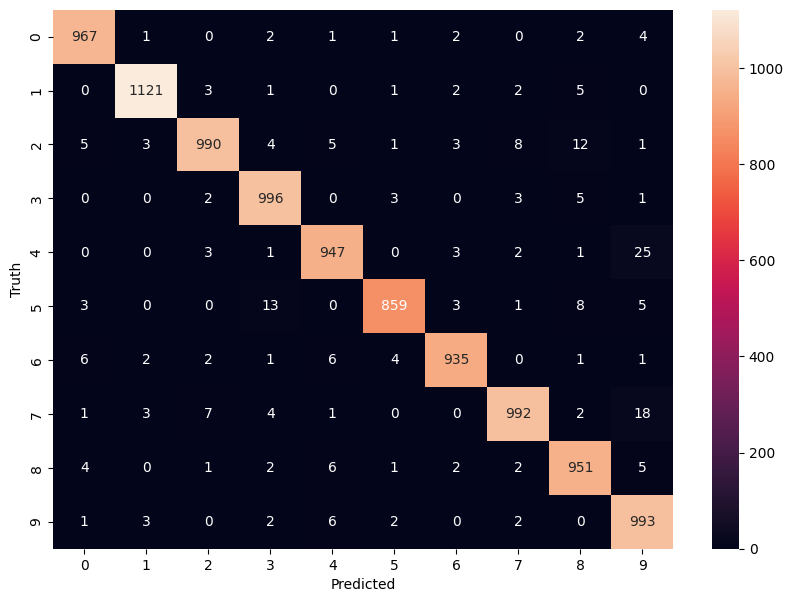

In [42]:
y_pred = model.predict(X_test_flat)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Flatten Using Keras

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(28,28)),
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2705 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1260 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0886 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0680 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0537 - accuracy: 0.9830


In [46]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0965 - accuracy: 0.9712


[0.09654966741800308, 0.9711999893188477]

313/313 [==============================] - 1s 3ms/step


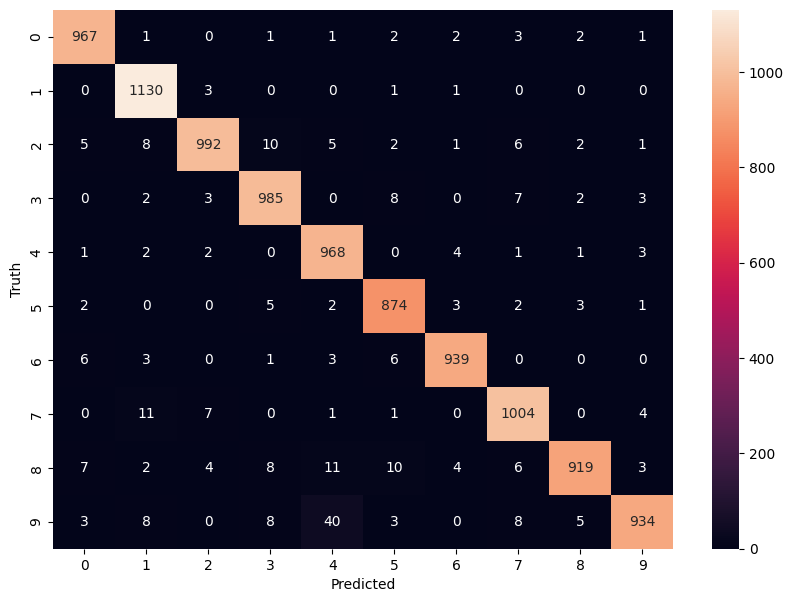

In [47]:
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Using SGD optimizer and MAE loss

In [52]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(28,28)),
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='sgd',loss=tf.keras.losses.MeanAbsoluteError(),metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 3.7063 - accuracy: 0.0908
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 3.6555 - accuracy: 0.0955
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 3.6535 - accuracy: 0.0971
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 3.6528 - accuracy: 0.0983
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 3.6524 - accuracy: 0.0988


In [53]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3.6402 - accuracy: 0.1079


[3.6401984691619873, 0.10790000110864639]